# Ridge Regression

Ridge Regression is a linear model that includes a regularization term to reduce overfitting. The cost function for Ridge regression is modified to include a penalty on the size of the coefficients, controlled by the regularization parameter 
𝛼
α.

The Ridge regression formula is:

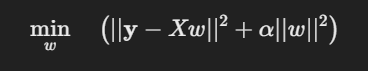

                       wmin( ∣∣y−Xw∣∣^2 + α∣∣w∣∣^2 )
Where:

y is the vector of target values.
X is the matrix of input features.
w are the model parameters (weights).
α is the regularization parameter that controls the strength of the penalty term ∣∣w∣∣^2 (the L2 norm of the weights).
Ridge Regression Formula
The closed-form solution for Ridge regression can be derived as follows:

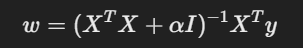

            w=(XT.X+αI)^−1 X.Ty
Where:

X.T is the transpose of the matrix 

I is the identity matrix.

αI adds the regularization (penalty) term to the normal equation.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [9]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
X = data.data
y = data.target

## With Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 13)

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [47]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  -0.00043029567779040434
RMSE:  70.0439153754476


In [60]:
print(lr.coef_)
print(lr.intercept_)

[ -17.28691266 -248.0885923   578.27946674  315.72999856 -571.32572115
  292.43070367  -17.46493017  120.18338433  695.01416778  108.05301725]
150.23367667649734


## With Ridge Regression

In [211]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.2,solver='cholesky')

In [213]:
R.fit(X_train, y_train)
y_pred = R.predict(X_test)

In [215]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.39140857975248255
RMSE:  54.631095577621444


In [217]:
print(R.coef_)
print(R.intercept_)

[   2.10450642 -182.11928294  489.26418743  280.20857072  -33.6290397
  -85.85012285 -196.28680012  114.79555879  389.55124821  132.23841288]
150.3350541093595


## With Ridge Regression (Gradient Descent - solver='sparse_cg')

In [228]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.2,max_iter = 500,solver='sparse_cg')

In [230]:
R.fit(X_train, y_train)
y_pred = R.predict(X_test)

In [232]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.391411255111454
RMSE:  54.63097549874139


In [234]:
print(R.coef_)
print(R.intercept_)

[   2.05062301 -182.13146732  489.20874812  280.29412156  -33.48601178
  -85.86802293 -196.45306231  114.6428468   389.52886219  132.21957958]
150.33497054768839


### Result - With Ridge Regression we get less RMSE

## With Self Made Ridge Class

In [246]:
class MyRidge:
    
    def __init__(self,alpha=0.2):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [248]:
reg = MyRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.39140857975248255
RMSE:  54.631095577621444


In [250]:
print(reg.coef_)
print(reg.intercept_)

[   2.10450642 -182.11928294  489.26418743  280.20857072  -33.6290397
  -85.85012285 -196.28680012  114.79555879  389.55124821  132.23841288]
150.33505410935953
